<a href="https://colab.research.google.com/github/saschaschworm/dsb/blob/master/Exercises/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST and LeNet-5 Convolutional Neural Network

In [1]:
# Installation of Required Packages. Restart the Runtime after Installation.
!pip install pydot
!apt-get install graphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,154 kB of

## Packages and Configuration

In [1]:
# Magic Commands
%matplotlib inline

# Third-Party Packages
from IPython.display import SVG
from keras.datasets import mnist
from keras.layers import Conv2D, AveragePooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.util import invert

# Matlotlib Configuration
plt.style.use('default')

Using TensorFlow backend.


## Data Import and Preprocessing

In [2]:
# The MNIST Dataset is already included in Keras, therefore we load it directly from the Package
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


### Data Preview

In [3]:
# Descriptive Information of the MINIST Dataset
print(f'Training Set: {x_train.shape[0]} Images, {x_train.shape[1]}x{x_train.shape[2]} Pixels')
print(f'Test Set: {x_test.shape[0]} Images, {x_test.shape[1]}x{x_test.shape[2]} Pixels')
print(f'Labels: {np.unique(y_train)}')

Training Set: 60000 Images, 28x28 Pixels
Test Set: 10000 Images, 28x28 Pixels
Labels: [0 1 2 3 4 5 6 7 8 9]


In [4]:
# Matrix Representation of the 1st Image in the Training Set
print('Matrix Representation of the 1st Image in the Training Set:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in x_train[0]]))

Matrix Representation of the 1st Image in the Training Set:
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0
0	0	0	0	0	0	0	0	0	0	0

Image Representation of the 1st Image in the Training Set:


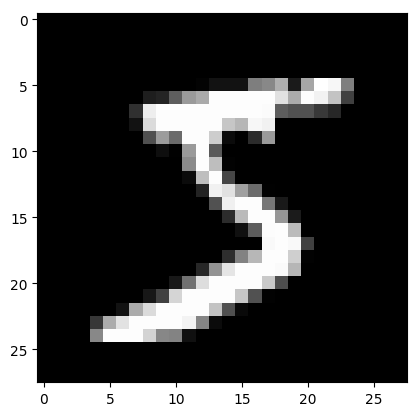

In [5]:
# Image Representation of the 1st Image in the Training Set
print('Image Representation of the 1st Image in the Training Set:')
plt.imshow(x_train[0], cmap='gray');

### Data Preprocessing

#### Channel Information

In [6]:
# A digital image has colour channels. For example, a coloured image has 3 Channels (RGB) and a grayscale image has only one.
# So far, the channel information is not included in the dataset, therefore we need to reshape our data.
print(f'Images without Channel Information: {x_train.shape}')

x_train, x_test = x_train.reshape(x_train.shape[0], 28, 28, 1), x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f'Images with Channel Information: {x_train.shape}')
print(f'This means we have {x_train.shape[0]} training images with {x_train.shape[3]} channel each and each channel has {x_train.shape[1]}x{x_train.shape[2]}={x_train.shape[1] * x_train.shape[2]} pixels and each pixel can take a value between 0-255')

Images without Channel Information: (60000, 28, 28)
Images with Channel Information: (60000, 28, 28, 1)
This means we have 60000 training images with 1 channel each and each channel has 28x28=784 pixels and each pixel can take a value between 0-255


#### Normalization

In [7]:
# To make convergence faster while training the network, we need to normalize the data.
# In this case we normalize the data by scaling the pixels in the range [0, 1].
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255

# Matrix Reprensentation of the 1st Image in the Training Set after Normalization
print('Matrix Reprensentation of the 1st Image in the Training Set after Normalization:')
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in x_train[0]]))

Matrix Reprensentation of the 1st Image in the Training Set after Normalization:
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]
[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.]	[0.01176471]	[0.07058824]	[0.07058824]	[0.07058824]	[0.49411765]	[0.53333336]	[0.6862745]	[0.10196079]	[0.6509804]	[1.]	[0.96862745]	[0.49803922]	[0.]	[0.]	[0.

#### Padding

In [8]:
# Our images are of size 28x28 pixels, but LeNet-5 requires images to be of size 32x32 pixels. 
# Therefore we pad each image with 2 additional pixels on the top, right, bottom and left.
x_train, x_test = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)), 'constant'), np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(x_train.shape)

(60000, 32, 32, 1)


#### One-Hot-Encoding

In [0]:
# Here we transform the target variable of each image. Instead of having 1 target variable of range [0, 9],
# we one-hot-encode the target variable so that we have 10 target variables (one for each digit) in range [0, 1] or [FALSE, TRUE].
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

## Network Building

In [0]:
# The Sequential model is a linear stack of layers and allows passing layer instances to the constructor
model = Sequential()

# Add Convolution and Pooling Layers according to LeNet-5 Architecture
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32, 32, 1), padding="same"))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

# Create Two Fully Connected Layers and the Output Layer
model.add(Flatten())
model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Compile the Network
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Network Summary

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 120)         48120     
_________________________________________________________________
flatten_1 (Flatten)          (None, 9720)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 84)                816564    
__________

### Network Visualization

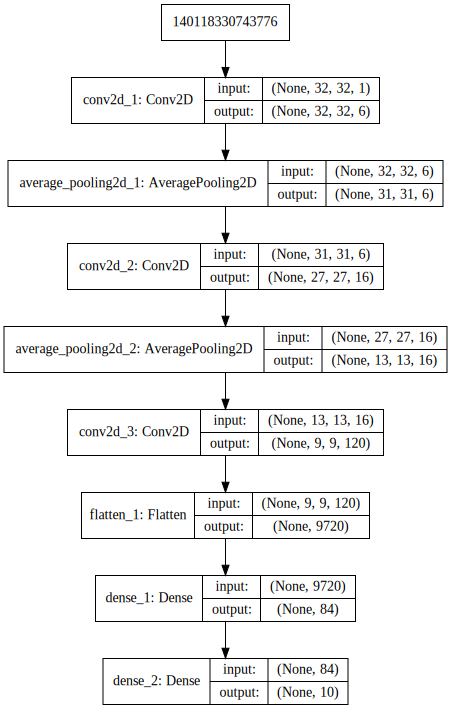

In [12]:
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

## Learning the Network Parameters

In [13]:
# Learn the Network Parameters in 10 Epochs with a Batch Size of 125. In each of the
# 10 Epochs, use 125 for Learning until all 60000 Instances have been used.
# This means in each epoch there are 60000/125=480 Iterations. 
result = model.fit(x_train, y_train, batch_size=125, epochs=10, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.2649 - acc: 0.9231 - val_loss: 0.1763 - val_acc: 0.9486
Epoch 2/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1623 - acc: 0.9528 - val_loss: 0.1376 - val_acc: 0.9595
Epoch 3/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.1377 - acc: 0.9584 - val_loss: 0.1340 - val_acc: 0.9607
Epoch 4/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.1137 - acc: 0.9661 - val_loss: 0.1177 - val_acc: 0.9659
Epoch 5/10
60000/60000 [==============================] - 8s 132us/step - loss: 0.0996 - acc: 0.9699 - val_loss: 0.0927 - val_acc: 0.9732
Epoch 6/10
60000/60000 [==============================] - 8s 131us/step - loss: 0.0847 - acc: 0.9746 - val_loss: 0.0807 - val_acc: 0.9740
Epoch 7/10
60000/60000 [==============================] - 8s 130us/step - loss: 0.0818 - acc: 0.9747 - val_loss: 0.0859 -

In [0]:
# Save the Trained Network including Architecture + Weights + Optimizer State
model.save('lenet5.h5')

## Evaluation

In [15]:
# Calculate the Network Accuracy on the Test Set
score = model.evaluate(x_test, y_test, verbose=1)
print(f'Cross-Entropy Loss and Accuracy on the Test Set: {score[0]:.2f}, {score[1] * 100:.2f}%')

10000/10000 [==============================] - 1s 94us/step
Cross-Entropy Loss and Accuracy on the Test Set: 0.07, 97.69%


### Visualization of Training and Test Loss

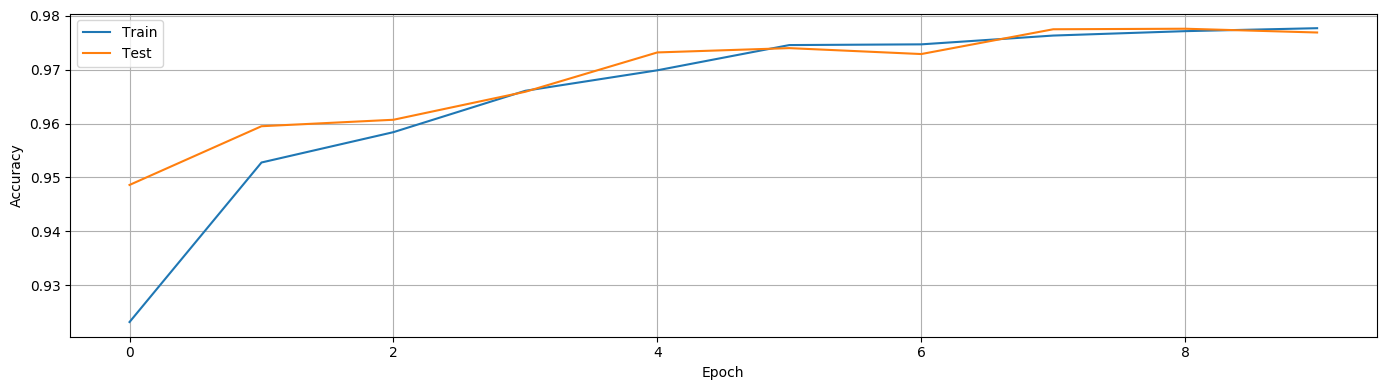

In [16]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.plot(result.history['acc'])
ax.plot(result.history['val_acc'])

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')

ax.legend(['Train', 'Test'], loc='upper left')
ax.grid()

plt.tight_layout()
plt.show()

## Classification of a Handwritten Digit

### Import Image

In [0]:
img_name = 'IMG_1712.jpg'
image = plt.imread('IMG_1712.jpg')

In [18]:
# Image Dimensions and Channels
print(f'This image has {image.shape[0]}x{image.shape[1]} Pixels in each of the {image.shape[2]} channels')
print('Due to the information we know that the image must be resized and converted to one channel only')

This image has 1242x1242 Pixels in each of the 3 channels
Due to the information we know that the image must be resized and converted to one channel only


The image must be inverted to it conforms to the training images.


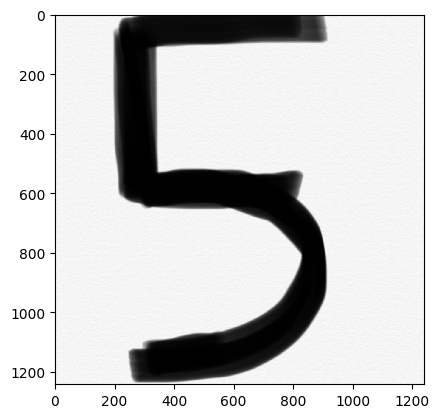

In [19]:
# Visualize the Image
print('The image must be inverted to it conforms to the training images.')
plt.imshow(image, cmap='gray');

### Image Preprocessing

In [20]:
print(f'Shape before Color Converting: {image.shape}')

# Convert Image to Grayscale
image = rgb2gray(image)
print(f'Shape after Color Converting: {image.shape}')

Shape before Color Converting: (1242, 1242, 3)
Shape after Color Converting: (1242, 1242)


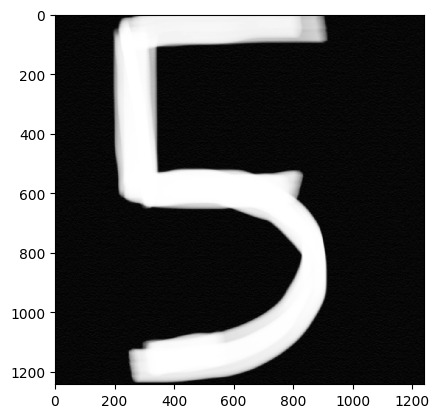

In [21]:
# Invert the Image
image = invert(image)
plt.imshow(image, cmap='gray');

In [22]:
# Resize the Image
image = resize(image, (28, 28), mode='constant')
print(f'Shape after Resizing: {image.shape}')

Shape after Resizing: (28, 28)


In [23]:
# Reshaping and Padding the Image
image = image.reshape(1, 28, 28, 1)
image = np.pad(image, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(f'Shape after Reshaping and Padding: {image.shape}')

Shape after Reshaping and Padding: (1, 32, 32, 1)


The image is already normalized so the normalization step must be skipped.

### Classification

In [24]:
# Predict Class Probabilities
model.predict(image, verbose=1)

1/1 [==============================] - 0s 86ms/step


array([[2.8071713e-07, 1.4111865e-04, 1.5977363e-06, 1.2347946e-03,
        5.6489713e-02, 9.3939525e-01, 5.7381651e-05, 7.1481700e-05,
        9.2026232e-05, 2.5163626e-03]], dtype=float32)

In [25]:
# Predict Class/Digit
model.predict_classes(image, verbose=1)

1/1 [==============================] - 0s 4ms/step


array([5])